<a href="https://colab.research.google.com/github/jodekpotasu/classification42/blob/main/projekt_prak2_bez_skalowania_ale_z_zapisem_pliku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Biblioteki i funkcje

In [1]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from google.colab import files
from bs4 import BeautifulSoup
import requests
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import plotly 
import plotly.graph_objects as go 
from plotly.offline import iplot 
import plotly.express as px
import plotly.figure_factory as ff
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import xlwt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# import random search, random forest, iris data, and distributions
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, truncnorm, randint
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(4,200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199)
}

Importy

In [3]:
url = 'https://raw.githubusercontent.com/jodekpotasu/classification42/main/df1.csv'
trainingx = pd.read_csv(url)

In [4]:
trainingx

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,14075.0,1.0
4445,7976,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,14075.0,1.0
4446,7977,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2104.0,2.0
4447,7978,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2104.0,2.0


In [5]:
forcheck=trainingx.drop(['EmployeeNumber'], axis=1)

In [6]:
duplicateRowsDF = forcheck[forcheck.duplicated()]

In [7]:
url = 'https://raw.githubusercontent.com/jodekpotasu/classification42/main/attrition.csv'
trainingy = pd.read_csv(url)

In [8]:
trainingy

,EmployeeNumber,Attrition
0,104,No
1,1638,No
2,164,No
3,395,No
4,53,No
...,...,...
4444,7975,Yes
4445,7976,Yes
4446,7977,Yes
4447,7978,Yes


In [9]:
url = 'https://raw.githubusercontent.com/jodekpotasu/classification42/main/df2.csv'
testx = pd.read_csv(url)

In [10]:
testx

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4445,7976,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4446,7977,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0
4447,7978,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0


In [11]:
url = 'https://raw.githubusercontent.com/jodekpotasu/classification42/main/sample_output.csv'
testy = pd.read_csv(url)

In [12]:
testy

,EmployeeNumber,Attrition
0,100000,1
1,100001,1
2,100002,1
3,100003,1
4,100004,1
...,...,...
142,100142,1
143,100143,1
144,100144,1
145,100145,1


In [13]:
trainingx2 = trainingx.merge(testx)

In [14]:
data = trainingx2.merge(trainingy)


Data cleaning

In [15]:
data = data.drop(['EmployeeCount','DailyRate',  'MonthlyRate'  ], axis=1)
data.describe(include='all')

,EmployeeNumber,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
count,4449.000000,4449.000000,4449,4449,4449.000000,4449.000000,4449,4449.000000,4449,4449.000000,4449.000000,4449.000000,4449,4449.000000,4449,4449.000000,4449.000000,4449,4449,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4302,4449.000000
unique,NaN,NaN,3,3,NaN,NaN,6,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN
freq,NaN,NaN,3147,2916,NaN,NaN,1823,NaN,2681,NaN,NaN,NaN,983,NaN,2074,NaN,NaN,4449,3186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2222,NaN
mean,7956.865588,416.187458,NaN,NaN,33339.433356,2.909867,NaN,2.719263,NaN,65.977073,2.739492,2.053495,NaN,2.724882,NaN,6468.496067,2.681726,NaN,NaN,15.187683,3.148573,2.725556,80.0,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,NaN,77621.952798
std,17226.922333,1566.205147,NaN,NaN,145352.131423,1.025184,NaN,1.093263,NaN,20.277369,0.712660,1.102979,NaN,1.107453,NaN,4682.905422,2.487077,NaN,NaN,3.642842,0.355707,1.080807,0.0,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,NaN,56194.865060
min,1.000000,18.000000,NaN,NaN,1.000000,1.000000,NaN,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,12108.000000
25%,1735.000000,31.000000,NaN,NaN,2.000000,2.000000,NaN,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2899.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,NaN,34788.000000
50%,5902.000000,36.000000,NaN,NaN,8.000000,3.000000,NaN,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4876.000000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,NaN,58512.000000
75%,7014.000000,45.000000,NaN,NaN,17.000000,4.000000,NaN,4.000000,NaN,84.000000,3.000000,3.000000,NaN,4.000000,NaN,8346.000000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,NaN,100152.000000


In [16]:

duplicateRowsDF = data.iloc[:,1:-2][data.iloc[:,1:-2].duplicated()]

In [17]:
duplicateRowsDF

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1471,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,8080.0,0.0
1472,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,8080.0,0.0
1474,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,6618.0,6.0,4.0,5.0,4.0,0.0,2.0
1476,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0
1477,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4442,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,Y,No,13.0,3.0,2.0,80.0,1.0,1220.0,3.0,4.0,13.0,7.0,5.0,7.0
4444,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0
4445,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0
4447,44.0,Non-Travel,Research & Development,918785.0,3.0,Medical,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0


In [18]:
duplicateRowsDF.insert(0, 'duplicates', 1)

In [19]:
duplicateRowsin = duplicateRowsDF.iloc[:,0]
duplicateRowsin

1471    1
1472    1
1474    1
1476    1
1477    1
       ..
4442    1
4444    1
4445    1
4447    1
4448    1
Name: duplicates, Length: 2026, dtype: int64

In [20]:
whicharedup1=data.merge(duplicateRowsin, how = 'right', left_index=True, right_index=True)
whicharedup1


,EmployeeNumber,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,duplicates
1471,5002,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,8080.0,0.0,Yes,61512.0,1
1472,5003,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,8080.0,0.0,No,61512.0,1
1474,5005,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,6618.0,6.0,4.0,5.0,4.0,0.0,2.0,Yes,93072.0,1
1476,5007,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0,1
1477,5008,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,Yes,39720.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4442,7973,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,Y,No,13.0,3.0,2.0,80.0,1.0,1220.0,3.0,4.0,13.0,7.0,5.0,7.0,No,160176.0,1
4444,7975,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,1
4445,7976,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,1
4447,7978,44.0,Non-Travel,Research & Development,918785.0,3.0,Medical,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0,1


In [21]:
whicharedup=data.merge(duplicateRowsin, how = 'left', left_index=True, right_index=True)
whicharedup


,EmployeeNumber,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,duplicates
0,104,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0,NaN
1,1638,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0,NaN
2,164,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0,NaN
3,395,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0,NaN
4,53,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,1.0
4445,7976,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,1.0
4446,7977,44.0,Non-Travel,Research & Development,918785.0,3.0,Medical,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0,NaN
4447,7978,44.0,Non-Travel,Research & Development,918785.0,3.0,Medical,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0,1.0


In [22]:

duplicateRowsDF = whicharedup1.iloc[:,1:][whicharedup1.iloc[:,1:].duplicated()]

In [23]:
duplicateRowsDF


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,duplicates
1483,32.0,Travel_Rarely,Research & Development,629986.0,2.0,Life Sciences,3.0,Female,39.0,3.0,3.0,Research Director,4.0,Single,11159.0,3.0,Y,No,15.0,3.0,4.0,80.0,0.0,10.0,6.0,3.0,7.0,7.0,7.0,7.0,Yes,133908.0,1
1502,43.0,Travel_Rarely,Human Resources,887003.0,3.0,Life Sciences,2.0,Male,97.0,3.0,1.0,Human Resources,4.0,Single,3539.0,0.0,Y,No,13.0,3.0,2.0,80.0,0.0,10.0,5.0,3.0,9.0,7.0,1.0,8.0,Yes,42468.0,1
1511,30.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,2.0,Female,73.0,4.0,3.0,Research Director,1.0,Married,11416.0,0.0,Y,Yes,12.0,3.0,3.0,80.0,3.0,9.0,4.0,2.0,8.0,7.0,1.0,7.0,Yes,136992.0,1
1514,28.0,Non-Travel,Human Resources,1.0,2.0,Life Sciences,3.0,Male,43.0,3.0,1.0,Human Resources,4.0,Divorced,2706.0,1.0,Y,No,15.0,3.0,2.0,80.0,1.0,3.0,2.0,3.0,3079.0,2.0,2.0,2.0,Yes,32472.0,1
1516,34.0,Travel_Rarely,Research & Development,2.0,4.0,Technical Degree,3.0,Female,98.0,3.0,2.0,Healthcare Representative,4.0,Single,6687.0,1.0,Y,No,11.0,3.0,4.0,80.0,0.0,14.0,2.0,4.0,14.0,11.0,4.0,11.0,Yes,80244.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4424,35.0,Travel_Rarely,Research & Development,25.0,2.0,Other,1.0,Male,54.0,2.0,2.0,Laboratory Technician,4.0,Single,3681.0,4.0,Y,No,14.0,3.0,4.0,80.0,0.0,9.0,3.0,3.0,3.0,2.0,0.0,2.0,Yes,44172.0,1
4426,29.0,Travel_Rarely,Sales,2.0,3.0,Medical,1.0,Male,78.0,2.0,2.0,Sales Executive,2.0,Married,6644.0,2.0,Y,No,19.0,3.0,2.0,80.0,2.0,10.0,2.0,3.0,0.0,0.0,0.0,0.0,Yes,79728.0,1
4427,29.0,Travel_Rarely,Sales,2.0,3.0,Medical,1.0,Male,78.0,2.0,2.0,Sales Executive,2.0,Married,6644.0,2.0,Y,No,19.0,3.0,2.0,80.0,2.0,10.0,2.0,3.0,0.0,0.0,0.0,0.0,Yes,79728.0,1
4445,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,1


In [24]:
#idea jest taka ze zle zakwalifikowane beda mialy w pierwszym dup=1 a w drugim dup=0
duplicateRowsDF.insert(0, 'wrongduplicates', 2)

In [25]:
duplicateRowsin = duplicateRowsDF.iloc[:,0]
duplicateRowsin

1483    2
1502    2
1511    2
1514    2
1516    2
       ..
4424    2
4426    2
4427    2
4445    2
4448    2
Name: wrongduplicates, Length: 516, dtype: int64

In [26]:
whicharedup2=whicharedup.merge(duplicateRowsin, how = 'left', left_index=True, right_index=True)
whicharedup2


,EmployeeNumber,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,duplicates,wrongduplicates
0,104,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0,NaN,NaN
1,1638,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0,NaN,NaN
2,164,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0,NaN,NaN
3,395,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0,NaN,NaN
4,53,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,1.0,NaN
4445,7976,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,1.0,2.0
4446,7977,44.0,Non-Travel,Research & Development,918785.0,3.0,Medical,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0,NaN,NaN
4447,7978,44.0,Non-Travel,Research & Development,918785.0,3.0,Medical,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0,1.0,NaN


bliżej :D

#idea jest taka ze zle zakwalifikowane beda mialy w pierwszym dup=1 a w drugim dup=0

In [27]:
whicharedup2['duplicates'] = whicharedup2['duplicates'].fillna(0)
whicharedup2['wrongduplicates'] = whicharedup2['wrongduplicates'].fillna(0)


In [28]:
def calculate_area(row):
    return row['duplicates'] + row['wrongduplicates']


In [29]:
# Use .apply to save the new column if we'd like
whicharedup2['todrop'] = whicharedup2.apply(calculate_area, axis=1)
whicharedup2

,EmployeeNumber,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,duplicates,wrongduplicates,todrop
0,104,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0,0.0,0.0,0.0
1,1638,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0,0.0,0.0,0.0
2,164,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0,0.0,0.0,0.0
3,395,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0,0.0,0.0,0.0
4,53,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,1.0,0.0,1.0
4445,7976,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,1.0,2.0,3.0
4446,7977,44.0,Non-Travel,Research & Development,918785.0,3.0,Medical,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0,0.0,0.0,0.0
4447,7978,44.0,Non-Travel,Research & Development,918785.0,3.0,Medical,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0,1.0,0.0,1.0


In [30]:
whicharedup2 = whicharedup2[whicharedup2['todrop']!=1]

In [31]:
whicharedup2

,EmployeeNumber,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,duplicates,wrongduplicates,todrop
0,104,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0,0.0,0.0,0.0
1,1638,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0,0.0,0.0,0.0
2,164,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0,0.0,0.0,0.0
3,395,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0,0.0,0.0,0.0
4,53,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440,7971,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,Y,No,13.0,3.0,2.0,80.0,1.0,1220.0,3.0,4.0,13.0,7.0,5.0,7.0,Yes,160176.0,0.0,0.0,0.0
4443,7974,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,0.0,0.0,0.0
4445,7976,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,1.0,2.0,3.0
4446,7977,44.0,Non-Travel,Research & Development,918785.0,3.0,Medical,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0,0.0,0.0,0.0


In [32]:
todata = whicharedup2.iloc[:,:-3]
todata

,EmployeeNumber,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440,7971,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,Y,No,13.0,3.0,2.0,80.0,1.0,1220.0,3.0,4.0,13.0,7.0,5.0,7.0,Yes,160176.0
4443,7974,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4445,7976,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4446,7977,44.0,Non-Travel,Research & Development,918785.0,3.0,Medical,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2.0,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0


In [33]:
todata3 = whicharedup2.iloc[:,0]

In [34]:
todata2 = whicharedup2.iloc[:,1:-3]

In [35]:
todata4 = todata2.drop_duplicates()

In [36]:
data=todata4.merge(todata3, how = 'left', left_index=True, right_index=True)

In [37]:
data

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,EmployeeNumber
0,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0,104
1,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0,1638
2,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0,164
3,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0,395
4,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,35.0,Non-Travel,Research & Development,8.0,4.0,Life Sciences,3.0,Female,52.0,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,1.0,Y,No,12.0,3.0,4.0,80.0,1.0,15.0,5.0,3.0,14.0,6755.0,2.0,9.0,Yes,49776.0,7966
4438,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,Y,No,23.0,4.0,3.0,80.0,1.0,21.0,3.0,3.0,20.0,3797.0,0.0,10.0,Yes,162840.0,7969
4440,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,Y,No,13.0,3.0,2.0,80.0,1.0,1220.0,3.0,4.0,13.0,7.0,5.0,7.0,Yes,160176.0,7971
4443,8823.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0,7974


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



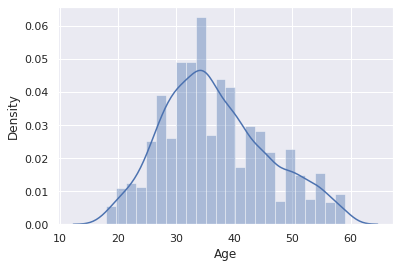

In [38]:
q = data['Age'].quantile(0.94)
data1 = data[data['Age']<q]
data1.describe(include = 'all')
sns.distplot(data1['Age'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



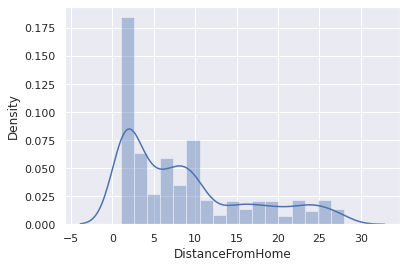

In [39]:
q = data1['DistanceFromHome'].quantile(0.94)
data2 = data1[data1['DistanceFromHome']<q]
data2.describe(include = 'all')
sns.distplot(data2['DistanceFromHome'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



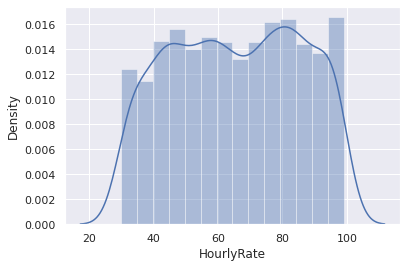

In [40]:
q = data2['HourlyRate'].quantile(0.9999)
data3 = data2[data2['HourlyRate' ]<q]
data3.describe(include = 'all')
sns.distplot(data3['HourlyRate' ])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



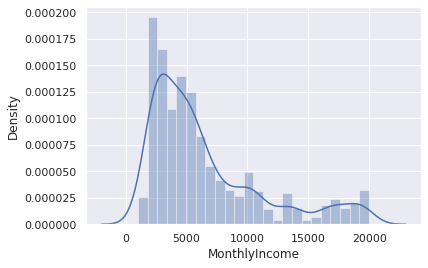

In [41]:
q = data3['MonthlyIncome'].quantile(0.9999)
data31 = data3[data3['MonthlyIncome']<q]
data31.describe(include = 'all')
sns.distplot(data31['MonthlyIncome'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



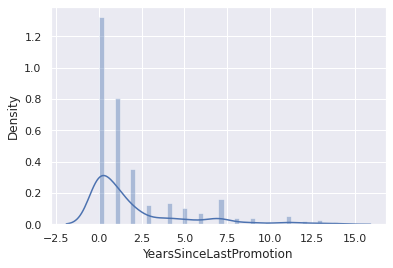

In [42]:
q = data31['YearsSinceLastPromotion'].quantile(0.93)
data32 = data31[data31['YearsSinceLastPromotion']<q]
data32.describe(include = 'all')
sns.distplot(data32['YearsSinceLastPromotion'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



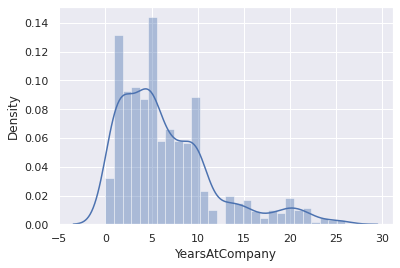

In [43]:
q = data32['YearsAtCompany'].quantile(0.93)
data33 = data32[data32['YearsAtCompany']<q]
data33.describe(include = 'all')
sns.distplot(data33['YearsAtCompany'])




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



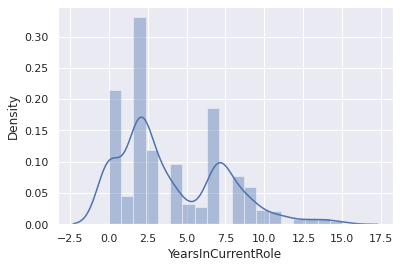

In [44]:
q = data33['YearsInCurrentRole'].quantile(0.92)
data34 = data33[data33['YearsInCurrentRole']<q]
sns.distplot(data34['YearsInCurrentRole'])


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



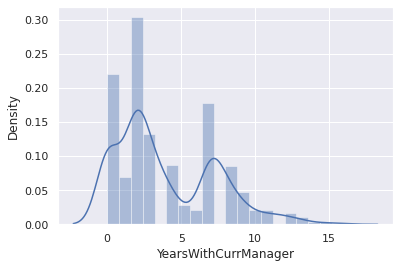

In [45]:
q = data34['YearsWithCurrManager'].quantile(0.925)
data35 = data34[data34['YearsWithCurrManager']<q]
sns.distplot(data35['YearsWithCurrManager'])


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



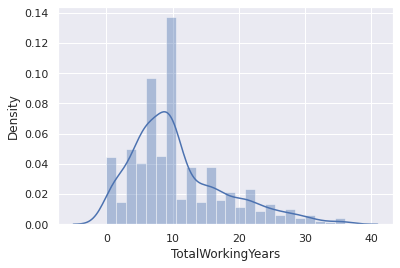

In [46]:
q = data35['TotalWorkingYears'].quantile(0.92)
data4 = data35[data35['TotalWorkingYears']<q]
sns.distplot(data4['TotalWorkingYears'])

In [47]:
xytest = data[data['Attrition']!='Yes']
xytest = xytest[xytest['Attrition']!='No']



In [48]:
xytest

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,EmployeeNumber
1323,35.0,Travel_Rarely,Research & Development,27.0,1.0,Medical,3.0,Female,53.0,2.0,1.0,Research Scientist,1.0,Single,2559.0,1.0,Y,No,11.0,3.0,4.0,80.0,0.0,6.0,3.0,2.0,6.0,5.0,1.0,1.0,NaN,30708.0,100000
1324,27.0,Travel_Rarely,Research & Development,5.0,3.0,Life Sciences,3.0,Female,85.0,3.0,1.0,Research Scientist,2.0,Single,2478.0,1.0,Y,Yes,12.0,3.0,2.0,80.0,0.0,4.0,2.0,2.0,4.0,3.0,1.0,2.0,NaN,29736.0,100001
1325,24.0,Travel_Rarely,Sales,4.0,1.0,Medical,4.0,Female,42.0,3.0,2.0,Sales Executive,3.0,Married,4162.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,5.0,3.0,3.0,5.0,4.0,0.0,3.0,NaN,49944.0,100002
1326,37.0,Non-Travel,Sales,9.0,4.0,Medical,1.0,Male,69.0,3.0,3.0,Sales Executive,2.0,Divorced,8834.0,1.0,Y,No,13.0,3.0,4.0,80.0,1.0,9.0,6.0,3.0,9.0,5.0,7.0,7.0,NaN,106008.0,100003
1327,33.0,Travel_Rarely,Research & Development,1.0,4.0,Other,4.0,Male,63.0,3.0,1.0,Research Scientist,4.0,Single,2686.0,1.0,Y,Yes,13.0,3.0,3.0,80.0,0.0,10.0,2.0,2.0,10.0,9.0,7.0,8.0,NaN,32232.0,100004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,35.0,Non-Travel,Research & Development,8.0,4.0,Life Sciences,3.0,Female,52.0,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,1.0,Y,No,12.0,3.0,4.0,80.0,1.0,15.0,5.0,3.0,14.0,11.0,2.0,9.0,NaN,49776.0,100142
1466,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,Y,No,23.0,4.0,3.0,80.0,1.0,21.0,3.0,3.0,20.0,7.0,0.0,10.0,NaN,162840.0,100143
1467,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,Y,No,13.0,3.0,2.0,80.0,1.0,18.0,3.0,4.0,13.0,7.0,5.0,7.0,NaN,160176.0,100144
1468,44.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,NaN,95736.0,100145


In [49]:
data4=data4.dropna()

In [50]:
data4

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,EmployeeNumber
0,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0,104
1,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0,1638
2,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0,164
3,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0,395
4,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,42.0,Non-Travel,Research & Development,23.0,2.0,Life Sciences,4.0,Male,37.0,2.0,2.0,Research Scientist,3.0,Single,4332.0,1.0,Y,No,12.0,3.0,4.0,80.0,0.0,20.0,2.0,3.0,20.0,9.0,3.0,7.0,No,51984.0,7933
4408,27.0,Travel_Rarely,Research & Development,7.0,3.0,Medical,4.0,Female,55.0,2.0,2.0,Healthcare Representative,1.0,Single,6811.0,8.0,Y,No,19.0,3.0,1.0,80.0,0.0,9.0,2.0,1.0,7.0,6.0,0.0,7.0,Yes,81732.0,7939
4417,39.0,Travel_Rarely,Research & Development,12.0,3.0,Medical,4.0,Male,66.0,3.0,2.0,Manufacturing Director,2.0,Married,5295.0,4.0,Y,No,21.0,4.0,3.0,80.0,0.0,7.0,3.0,3.0,5.0,4.0,1.0,0.0,Yes,63540.0,7948
4424,35.0,Travel_Rarely,Research & Development,25.0,2.0,Other,1.0,Male,54.0,2.0,2.0,Laboratory Technician,4.0,Single,3681.0,4.0,Y,No,14.0,3.0,4.0,80.0,0.0,9.0,3.0,3.0,3.0,2.0,0.0,2.0,Yes,44172.0,7955


In [51]:
data4.isnull().sum(axis = 0)
data4.reset_index(drop=True)
xytest.reset_index(drop=True)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,EmployeeNumber
0,35.0,Travel_Rarely,Research & Development,27.0,1.0,Medical,3.0,Female,53.0,2.0,1.0,Research Scientist,1.0,Single,2559.0,1.0,Y,No,11.0,3.0,4.0,80.0,0.0,6.0,3.0,2.0,6.0,5.0,1.0,1.0,NaN,30708.0,100000
1,27.0,Travel_Rarely,Research & Development,5.0,3.0,Life Sciences,3.0,Female,85.0,3.0,1.0,Research Scientist,2.0,Single,2478.0,1.0,Y,Yes,12.0,3.0,2.0,80.0,0.0,4.0,2.0,2.0,4.0,3.0,1.0,2.0,NaN,29736.0,100001
2,24.0,Travel_Rarely,Sales,4.0,1.0,Medical,4.0,Female,42.0,3.0,2.0,Sales Executive,3.0,Married,4162.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,5.0,3.0,3.0,5.0,4.0,0.0,3.0,NaN,49944.0,100002
3,37.0,Non-Travel,Sales,9.0,4.0,Medical,1.0,Male,69.0,3.0,3.0,Sales Executive,2.0,Divorced,8834.0,1.0,Y,No,13.0,3.0,4.0,80.0,1.0,9.0,6.0,3.0,9.0,5.0,7.0,7.0,NaN,106008.0,100003
4,33.0,Travel_Rarely,Research & Development,1.0,4.0,Other,4.0,Male,63.0,3.0,1.0,Research Scientist,4.0,Single,2686.0,1.0,Y,Yes,13.0,3.0,3.0,80.0,0.0,10.0,2.0,2.0,10.0,9.0,7.0,8.0,NaN,32232.0,100004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,35.0,Non-Travel,Research & Development,8.0,4.0,Life Sciences,3.0,Female,52.0,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,1.0,Y,No,12.0,3.0,4.0,80.0,1.0,15.0,5.0,3.0,14.0,11.0,2.0,9.0,NaN,49776.0,100142
143,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,Y,No,23.0,4.0,3.0,80.0,1.0,21.0,3.0,3.0,20.0,7.0,0.0,10.0,NaN,162840.0,100143
144,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,Y,No,13.0,3.0,2.0,80.0,1.0,18.0,3.0,4.0,13.0,7.0,5.0,7.0,NaN,160176.0,100144
145,44.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,NaN,95736.0,100145


In [52]:
data4.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,EmployeeNumber
count,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.0,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000
mean,36.507102,8.676136,2.884233,2.745739,65.789773,2.754261,2.011364,2.737926,6244.639205,2.669744,15.118608,3.142045,2.718040,80.0,0.809659,10.708807,2.798295,2.760653,6.488636,4.002841,1.924716,3.962358,74935.670455,1714.489347
std,8.879431,7.610653,1.020100,1.082580,19.963929,0.701797,1.064988,1.092813,4491.290477,2.512998,3.564732,0.349221,1.081295,0.0,0.852684,7.238088,1.300242,0.698430,5.195661,3.405751,2.795572,3.410445,53895.485722,1905.762716
min,18.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000,1.000000
25%,30.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2874.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34488.000000,578.750000
50%,35.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4809.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,57708.000000,1174.000000
75%,42.000000,13.000000,4.000000,4.000000,83.000000,3.000000,2.000000,4.000000,7672.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,92070.000000,1771.250000
max,59.000000,28.000000,5.000000,4.000000,99.000000,4.000000,5.000000,4.000000,19926.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,36.000000,6.000000,4.000000,26.000000,15.000000,14.000000,16.000000,239112.000000,7957.000000


In [53]:
data4.head(100)


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,EmployeeNumber
0,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0,104
1,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0,1638
2,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0,164
3,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0,395
4,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,36.0,Travel_Rarely,Sales,2.0,4.0,Life Sciences,3.0,Male,70.0,3.0,1.0,Sales Representative,4.0,Single,2644.0,3.0,Y,Yes,21.0,4.0,4.0,80.0,0.0,7.0,3.0,2.0,3.0,2.0,1.0,2.0,No,31728.0,1556
104,30.0,Travel_Rarely,Research & Development,18.0,3.0,Life Sciences,1.0,Female,75.0,3.0,1.0,Research Scientist,3.0,Single,2632.0,1.0,Y,No,14.0,3.0,3.0,80.0,0.0,5.0,4.0,2.0,5.0,4.0,0.0,4.0,No,31584.0,194
105,33.0,Travel_Rarely,Research & Development,4.0,4.0,Medical,3.0,Female,47.0,2.0,1.0,Research Scientist,2.0,Married,2622.0,6.0,Y,No,21.0,4.0,4.0,80.0,0.0,7.0,3.0,3.0,3.0,2.0,1.0,1.0,No,31464.0,305
106,31.0,Travel_Rarely,Research & Development,12.0,1.0,Medical,3.0,Female,95.0,3.0,1.0,Research Scientist,4.0,Married,3929.0,8.0,Y,Yes,23.0,4.0,3.0,80.0,1.0,7.0,0.0,3.0,4.0,2.0,0.0,2.0,No,47148.0,246


In [54]:
data4.YearsWithCurrManager.unique()

array([ 0.,  2.,  3.,  7.,  8.,  9.,  6., 11.,  4., 12.,  5., 10.,  1.,
       13., 14., 16., 15.])

In [55]:
data4.YearsWithCurrManager.value_counts()



2.0     336
0.0     253
7.0     194
3.0     148
8.0     103
4.0      97
1.0      78
9.0      53
5.0      30
6.0      28
11.0     24
10.0     24
12.0     20
13.0     12
15.0      4
16.0      2
14.0      2
Name: YearsWithCurrManager, dtype: int64

In [56]:
YN_mapping = {"Yes": 1, "No": 0}

In [57]:
data4.iloc[:,-3] = data4.iloc[:,-3].map(YN_mapping)

In [58]:
data4.iloc[:,17]

0       Yes
1       Yes
2        No
3        No
4        No
       ... 
4402     No
4408     No
4417     No
4424     No
4426     No
Name: OverTime, Length: 1408, dtype: object

In [59]:
data4.iloc[:,17] = data4.iloc[:,17].map(YN_mapping)
xytest.iloc[:,17] = xytest.iloc[:,17].map(YN_mapping)

In [60]:
data4 = data4.drop(['HourlyRate',  'Over18',  'YearlyIncome'], axis=1)
xytest = xytest.drop(['HourlyRate',  'Over18',  'YearlyIncome'], axis=1)


In [61]:
xytest

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,EmployeeNumber
1323,35.0,Travel_Rarely,Research & Development,27.0,1.0,Medical,3.0,Female,2.0,1.0,Research Scientist,1.0,Single,2559.0,1.0,0,11.0,3.0,4.0,80.0,0.0,6.0,3.0,2.0,6.0,5.0,1.0,1.0,NaN,100000
1324,27.0,Travel_Rarely,Research & Development,5.0,3.0,Life Sciences,3.0,Female,3.0,1.0,Research Scientist,2.0,Single,2478.0,1.0,1,12.0,3.0,2.0,80.0,0.0,4.0,2.0,2.0,4.0,3.0,1.0,2.0,NaN,100001
1325,24.0,Travel_Rarely,Sales,4.0,1.0,Medical,4.0,Female,3.0,2.0,Sales Executive,3.0,Married,4162.0,1.0,1,12.0,3.0,3.0,80.0,2.0,5.0,3.0,3.0,5.0,4.0,0.0,3.0,NaN,100002
1326,37.0,Non-Travel,Sales,9.0,4.0,Medical,1.0,Male,3.0,3.0,Sales Executive,2.0,Divorced,8834.0,1.0,0,13.0,3.0,4.0,80.0,1.0,9.0,6.0,3.0,9.0,5.0,7.0,7.0,NaN,100003
1327,33.0,Travel_Rarely,Research & Development,1.0,4.0,Other,4.0,Male,3.0,1.0,Research Scientist,4.0,Single,2686.0,1.0,1,13.0,3.0,3.0,80.0,0.0,10.0,2.0,2.0,10.0,9.0,7.0,8.0,NaN,100004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,35.0,Non-Travel,Research & Development,8.0,4.0,Life Sciences,3.0,Female,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,1.0,0,12.0,3.0,4.0,80.0,1.0,15.0,5.0,3.0,14.0,11.0,2.0,9.0,NaN,100142
1466,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,0,23.0,4.0,3.0,80.0,1.0,21.0,3.0,3.0,20.0,7.0,0.0,10.0,NaN,100143
1467,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,0,13.0,3.0,2.0,80.0,1.0,18.0,3.0,4.0,13.0,7.0,5.0,7.0,NaN,100144
1468,44.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,0,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,NaN,100145


In [62]:
testx=xytest.iloc[:,:-2]
testx

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1323,35.0,Travel_Rarely,Research & Development,27.0,1.0,Medical,3.0,Female,2.0,1.0,Research Scientist,1.0,Single,2559.0,1.0,0,11.0,3.0,4.0,80.0,0.0,6.0,3.0,2.0,6.0,5.0,1.0,1.0
1324,27.0,Travel_Rarely,Research & Development,5.0,3.0,Life Sciences,3.0,Female,3.0,1.0,Research Scientist,2.0,Single,2478.0,1.0,1,12.0,3.0,2.0,80.0,0.0,4.0,2.0,2.0,4.0,3.0,1.0,2.0
1325,24.0,Travel_Rarely,Sales,4.0,1.0,Medical,4.0,Female,3.0,2.0,Sales Executive,3.0,Married,4162.0,1.0,1,12.0,3.0,3.0,80.0,2.0,5.0,3.0,3.0,5.0,4.0,0.0,3.0
1326,37.0,Non-Travel,Sales,9.0,4.0,Medical,1.0,Male,3.0,3.0,Sales Executive,2.0,Divorced,8834.0,1.0,0,13.0,3.0,4.0,80.0,1.0,9.0,6.0,3.0,9.0,5.0,7.0,7.0
1327,33.0,Travel_Rarely,Research & Development,1.0,4.0,Other,4.0,Male,3.0,1.0,Research Scientist,4.0,Single,2686.0,1.0,1,13.0,3.0,3.0,80.0,0.0,10.0,2.0,2.0,10.0,9.0,7.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,35.0,Non-Travel,Research & Development,8.0,4.0,Life Sciences,3.0,Female,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,1.0,0,12.0,3.0,4.0,80.0,1.0,15.0,5.0,3.0,14.0,11.0,2.0,9.0
1466,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,0,23.0,4.0,3.0,80.0,1.0,21.0,3.0,3.0,20.0,7.0,0.0,10.0
1467,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,0,13.0,3.0,2.0,80.0,1.0,18.0,3.0,4.0,13.0,7.0,5.0,7.0
1468,44.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,0,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0


In [63]:
#i nie skaluję
# forscaling = data42.loc[:,['Age','DistanceFromHome', 'MonthlyIncome']]
# forscaling2 = testx.loc[:,['Age','DistanceFromHome',  'MonthlyIncome']]


Wizualizacje i choosing features

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



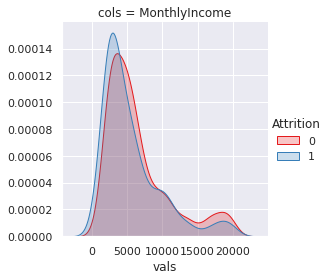

In [64]:
Age_YAC_NCW = data4[[ 'MonthlyIncome','Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Focus on the red area--distribution of Attrition
#Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture.. 
#Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



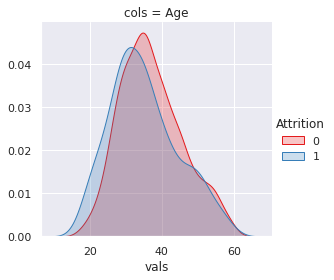

In [65]:
Age_YAC_NCW = data4[['Age','Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Focus on the red area--distribution of Attrition
#Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture.. 
#Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



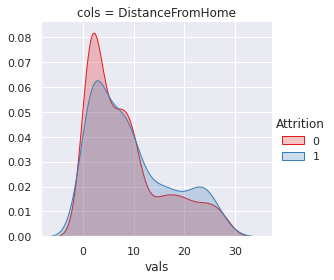

In [66]:
Age_YAC_NCW = data4[['DistanceFromHome','Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Focus on the red area--distribution of Attrition
#Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture.. 
#Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use 

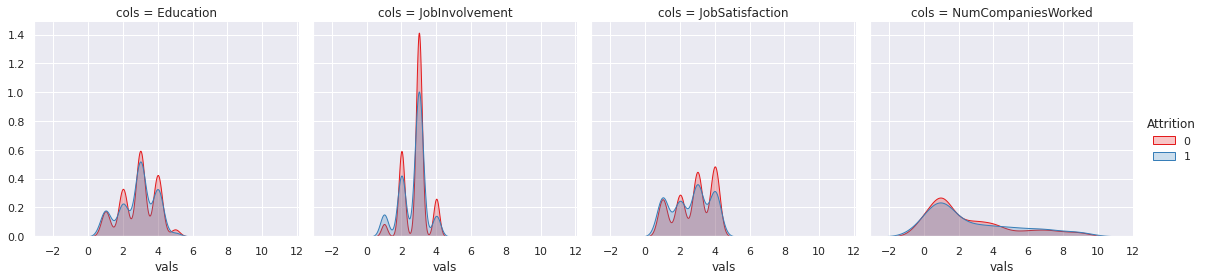

In [67]:
Age_YAC_NCW = data4[[ 'Education', 'JobInvolvement','JobSatisfaction', 'NumCompaniesWorked', 'Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use 

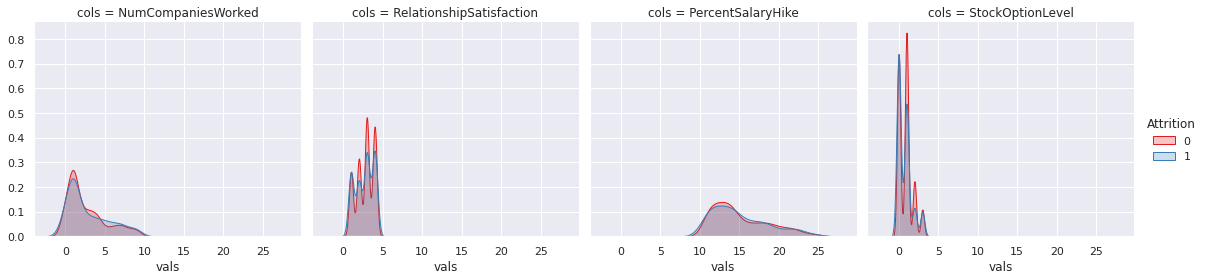

In [68]:
Age_YAC_NCW = data4[[ 'NumCompaniesWorked', 'RelationshipSatisfaction','PercentSalaryHike', 'StockOptionLevel', 'Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#NumCompaniesWorked	PercentSalaryHike	PerformanceRating	RelationshipSatisfaction	
#StandardHours	StockOptionLevel	TotalWorkingYears	TrainingTimesLastYear	WorkLifeBalance	YearsAtCompany	
#YearsInCurrentRole	YearsSinceLastPromotion	YearsWithCurrManager

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use 

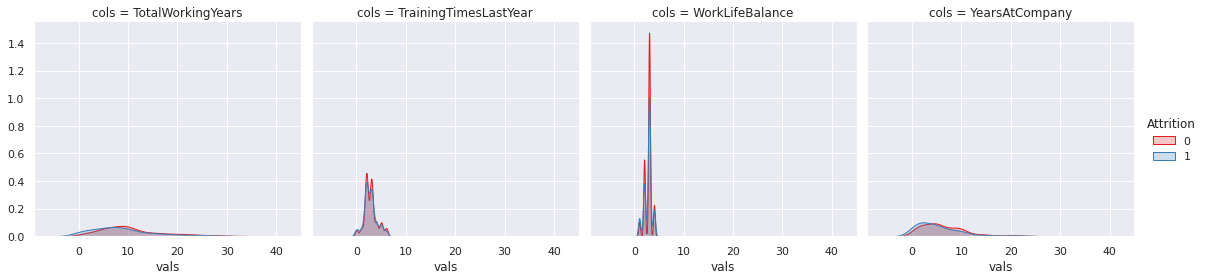

In [69]:
Age_YAC_NCW = data4[[ 'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#NumCompaniesWorked	PercentSalaryHike	PerformanceRating	RelationshipSatisfaction	
#StandardHours	StockOptionLevel	TotalWorkingYears	TrainingTimesLastYear	WorkLifeBalance	YearsAtCompany	
#YearsInCurrentRole	YearsSinceLastPromotion	YearsWithCurrManager

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use 

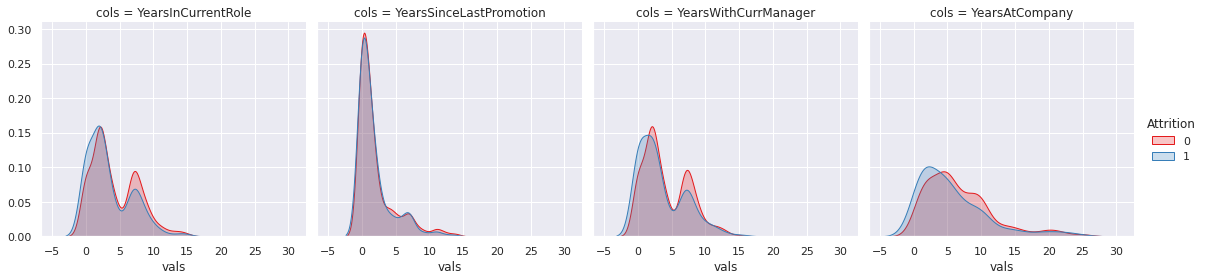

In [70]:
Age_YAC_NCW = data4[[ 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager', 'YearsAtCompany', 'Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#NumCompaniesWorked	PercentSalaryHike	PerformanceRating	RelationshipSatisfaction	
#StandardHours	StockOptionLevel	TotalWorkingYears	TrainingTimesLastYear	WorkLifeBalance	YearsAtCompany	
#YearsInCurrentRole	YearsSinceLastPromotion	YearsWithCurrManager

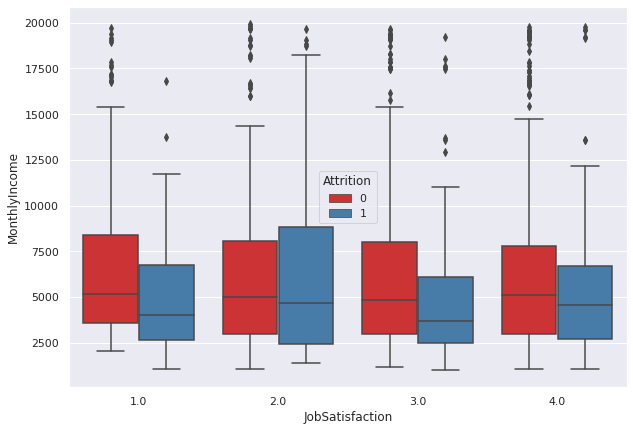

In [71]:
plt.figure(figsize=(10,7))
sns.boxplot(x="JobSatisfaction", y="MonthlyIncome", hue="Attrition",
            data=data4, palette="Set1")

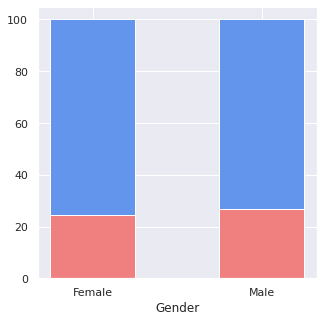

In [72]:
# Data
r = [0,1]
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['Gender'] == 'Female')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['Gender'] == 'Female')])
Y_M = len(data4[(data4['Attrition'] == 1) & (data4['Gender'] == 'Male')])
N_M = len(data4[(data4['Attrition'] == 0) & (data4['Gender'] == 'Male')])
raw_data = {'greenBars': [Y_F, Y_M], 'orangeBars': [N_F, N_M]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Female','Male')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Gender")
 
# Show graphic
plt.show()

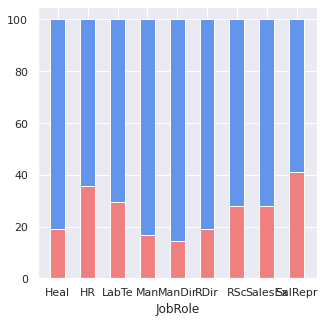

In [73]:
# Data
r = [0,1,2,3,4,5,6,7,8]
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Healthcare Representative')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Healthcare Representative')])
Y_M = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Human Resources')])
N_M = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Human Resources')])
Y_C = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Laboratory Technician')])
N_C = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Laboratory Technician')])
Y_D = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Manager')])
N_D = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Manager')])
Y_E = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Manufacturing Director')])
N_E = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Manufacturing Director')])
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Research Director')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Research Director')])
Y_G = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Research Scientist')])
N_G = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Research Scientist')])
Y_H = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Sales Executive')])
N_H = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Sales Executive')])
Y_I = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Sales Representative')])
N_I = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Sales Representative')])

raw_data = {'greenBars': [Y_F, Y_M,Y_C,Y_D,Y_E,Y_F,Y_G,Y_H,Y_I], 'orangeBars': [N_F, N_M,N_C,N_D,N_E,N_F,N_G,N_H,N_I]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Heal','HR','LabTe','Man','ManDir','RDir', 'RSc', 'SalesEx', 'SalRepr' )
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('JobRole')
 
# Show graphic
plt.show()

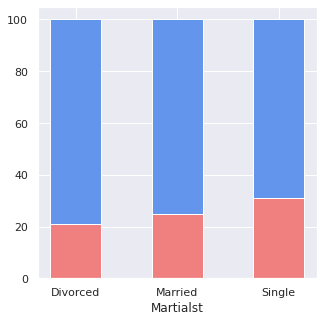

In [74]:
# Data
r = [0,1,2]
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['MaritalStatus'] == 'Divorced')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['MaritalStatus'] == 'Divorced')])
Y_M = len(data4[(data4['Attrition'] == 1) & (data4['MaritalStatus'] == 'Married')])
N_M = len(data4[(data4['Attrition'] == 0) & (data4['MaritalStatus'] == 'Married')])
Y_C = len(data4[(data4['Attrition'] == 1) & (data4['MaritalStatus'] == 'Single')])
N_C = len(data4[(data4['Attrition'] == 0) & (data4['MaritalStatus'] == 'Single')])

raw_data = {'greenBars': [Y_F, Y_M,Y_C], 'orangeBars': [N_F, N_M,N_C]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Divorced','Married','Single')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('Martialst')
 
# Show graphic
plt.show()

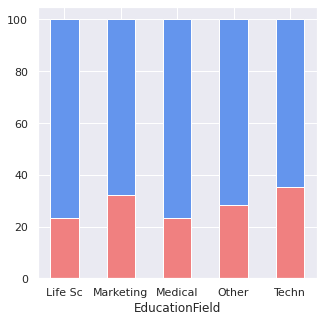

In [75]:
# Data
r = [0,1,2,3,4]
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['EducationField'] == 'Life Sciences')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['EducationField'] == 'Life Sciences')])
Y_M = len(data4[(data4['Attrition'] == 1) & (data4['EducationField'] == 'Marketing')])
N_M = len(data4[(data4['Attrition'] == 0) & (data4['EducationField'] == 'Marketing')])
Y_C = len(data4[(data4['Attrition'] == 1) & (data4['EducationField'] == 'Medical')])
N_C = len(data4[(data4['Attrition'] == 0) & (data4['EducationField'] == 'Medical')])
Y_D = len(data4[(data4['Attrition'] == 1) & (data4['EducationField'] == 'Other')])
N_D = len(data4[(data4['Attrition'] == 0) & (data4['EducationField'] == 'Other')])
Y_E = len(data4[(data4['Attrition'] == 1) & (data4['EducationField'] == 'Technical Degree')])
N_E = len(data4[(data4['Attrition'] == 0) & (data4['EducationField'] == 'Technical Degree')])

raw_data = {'greenBars': [Y_F, Y_M,Y_C,Y_D,Y_E], 'orangeBars': [N_F, N_M,N_C,N_D,N_E]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Life Sc','Marketing','Medical','Other','Techn' )
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('EducationField')
 
# Show graphic
plt.show()

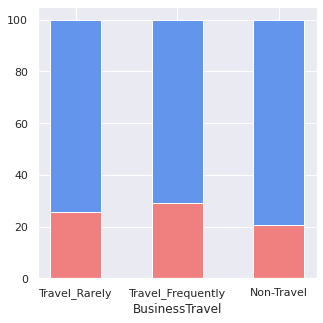

In [76]:
# Data
r = [0,1,2]
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['BusinessTravel'] == 'Travel_Rarely')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['BusinessTravel'] == 'Travel_Rarely')])
Y_M = len(data4[(data4['Attrition'] == 1) & (data4['BusinessTravel'] == 'Travel_Frequently')])
N_M = len(data4[(data4['Attrition'] == 0) & (data4['BusinessTravel'] == 'Travel_Frequently')])
Y_C = len(data4[(data4['Attrition'] == 1) & (data4['BusinessTravel'] == 'Non-Travel')])
N_C = len(data4[(data4['Attrition'] == 0) & (data4['BusinessTravel'] == 'Non-Travel')])

raw_data = {'greenBars': [Y_F, Y_M,Y_C], 'orangeBars': [N_F, N_M,N_C]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Travel_Rarely','Travel_Frequently','Non-Travel')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('BusinessTravel')
 
# Show graphic
plt.show()

In [77]:
# nonscaled = data4.loc[:,[ 'Education', 'EducationField', 'JobInvolvement',  'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked']]
# nonscaled2 = testx.loc[:,[ 'Education', 'EducationField', 'JobInvolvement',  'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked']]
# #gender wywalony po comparison, to samo business travel
#narazie nic nie wywalam

In [78]:
data4

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,EmployeeNumber
0,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,1,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,0,104
1,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,1,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0,1638
2,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,0,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,0,164
3,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,0,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,0,395
4,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,0,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,42.0,Non-Travel,Research & Development,23.0,2.0,Life Sciences,4.0,Male,2.0,2.0,Research Scientist,3.0,Single,4332.0,1.0,0,12.0,3.0,4.0,80.0,0.0,20.0,2.0,3.0,20.0,9.0,3.0,7.0,0,7933
4408,27.0,Travel_Rarely,Research & Development,7.0,3.0,Medical,4.0,Female,2.0,2.0,Healthcare Representative,1.0,Single,6811.0,8.0,0,19.0,3.0,1.0,80.0,0.0,9.0,2.0,1.0,7.0,6.0,0.0,7.0,1,7939
4417,39.0,Travel_Rarely,Research & Development,12.0,3.0,Medical,4.0,Male,3.0,2.0,Manufacturing Director,2.0,Married,5295.0,4.0,0,21.0,4.0,3.0,80.0,0.0,7.0,3.0,3.0,5.0,4.0,1.0,0.0,1,7948
4424,35.0,Travel_Rarely,Research & Development,25.0,2.0,Other,1.0,Male,2.0,2.0,Laboratory Technician,4.0,Single,3681.0,4.0,0,14.0,3.0,4.0,80.0,0.0,9.0,3.0,3.0,3.0,2.0,0.0,2.0,1,7955


In [79]:
y = data4.iloc[:,-2]
y

0       0
1       0
2       0
3       0
4       0
       ..
4402    0
4408    1
4417    1
4424    1
4426    1
Name: Attrition, Length: 1408, dtype: int64

In [80]:
x = data4.iloc[:,:-2]

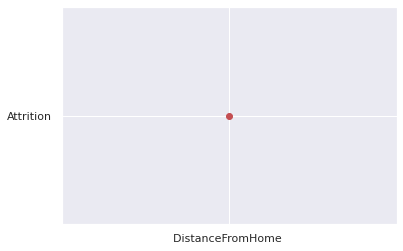

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.scatter('DistanceFromHome ','Attrition', color='r')

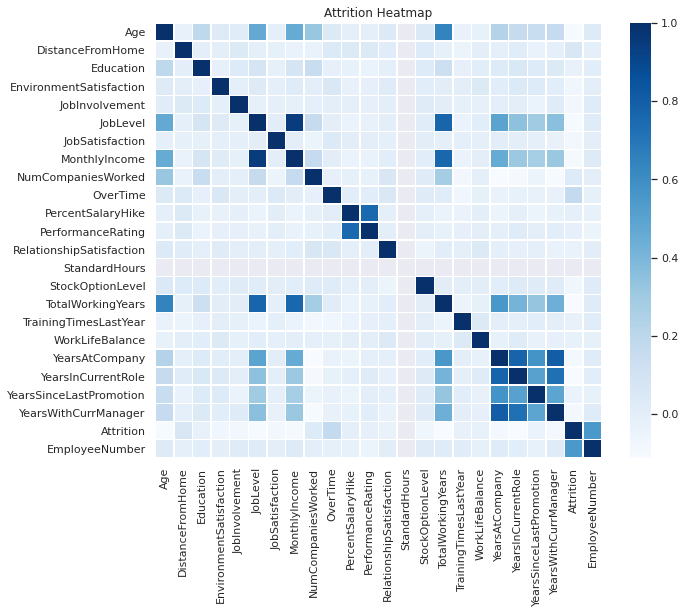

In [82]:
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Attrition Heatmap")
corr = data4.corr()
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values, cmap="Blues",linewidths=.5)

In [83]:
testx2=testx

In [84]:
testx2

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1323,35.0,Travel_Rarely,Research & Development,27.0,1.0,Medical,3.0,Female,2.0,1.0,Research Scientist,1.0,Single,2559.0,1.0,0,11.0,3.0,4.0,80.0,0.0,6.0,3.0,2.0,6.0,5.0,1.0,1.0
1324,27.0,Travel_Rarely,Research & Development,5.0,3.0,Life Sciences,3.0,Female,3.0,1.0,Research Scientist,2.0,Single,2478.0,1.0,1,12.0,3.0,2.0,80.0,0.0,4.0,2.0,2.0,4.0,3.0,1.0,2.0
1325,24.0,Travel_Rarely,Sales,4.0,1.0,Medical,4.0,Female,3.0,2.0,Sales Executive,3.0,Married,4162.0,1.0,1,12.0,3.0,3.0,80.0,2.0,5.0,3.0,3.0,5.0,4.0,0.0,3.0
1326,37.0,Non-Travel,Sales,9.0,4.0,Medical,1.0,Male,3.0,3.0,Sales Executive,2.0,Divorced,8834.0,1.0,0,13.0,3.0,4.0,80.0,1.0,9.0,6.0,3.0,9.0,5.0,7.0,7.0
1327,33.0,Travel_Rarely,Research & Development,1.0,4.0,Other,4.0,Male,3.0,1.0,Research Scientist,4.0,Single,2686.0,1.0,1,13.0,3.0,3.0,80.0,0.0,10.0,2.0,2.0,10.0,9.0,7.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,35.0,Non-Travel,Research & Development,8.0,4.0,Life Sciences,3.0,Female,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,1.0,0,12.0,3.0,4.0,80.0,1.0,15.0,5.0,3.0,14.0,11.0,2.0,9.0
1466,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,0,23.0,4.0,3.0,80.0,1.0,21.0,3.0,3.0,20.0,7.0,0.0,10.0
1467,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,0,13.0,3.0,2.0,80.0,1.0,18.0,3.0,4.0,13.0,7.0,5.0,7.0
1468,44.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,0,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0


In [85]:
x2 = x
x = x2.drop(['JobLevel',  'StandardHours',  'TotalWorkingYears', 'YearsWithCurrManager' ], axis=1)
testx2=testx
testx = testx2.drop(['JobLevel',  'StandardHours',  'TotalWorkingYears', 'YearsWithCurrManager'], axis=1)

In [86]:
datascaled = pd.get_dummies (x)
datascaledtest = pd.get_dummies (testx)

In [87]:
datascaled
#datascaledtest


,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,30.0,1.0,1.0,4.0,2.0,4.0,5126.0,1.0,1,12.0,3.0,3.0,2.0,1.0,2.0,10.0,8.0,3.0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,38.0,2.0,2.0,4.0,2.0,3.0,7756.0,3.0,1,19.0,3.0,4.0,1.0,6.0,4.0,5.0,4.0,0.0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,26.0,6.0,3.0,3.0,2.0,2.0,2368.0,1.0,0,19.0,3.0,3.0,0.0,3.0,2.0,5.0,4.0,4.0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,28.0,8.0,2.0,4.0,3.0,4.0,3310.0,1.0,0,21.0,4.0,4.0,0.0,3.0,3.0,5.0,3.0,0.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,35.0,4.0,2.0,3.0,3.0,4.0,1951.0,1.0,0,12.0,3.0,3.0,1.0,3.0,3.0,1.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,42.0,23.0,2.0,4.0,2.0,3.0,4332.0,1.0,0,12.0,3.0,4.0,0.0,2.0,3.0,20.0,9.0,3.0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4408,27.0,7.0,3.0,4.0,2.0,1.0,6811.0,8.0,0,19.0,3.0,1.0,0.0,2.0,1.0,7.0,6.0,0.0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
4417,39.0,12.0,3.0,4.0,3.0,2.0,5295.0,4.0,0,21.0,4.0,3.0,0.0,3.0,3.0,5.0,4.0,1.0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4424,35.0,25.0,2.0,1.0,2.0,4.0,3681.0,4.0,0,14.0,3.0,4.0,0.0,3.0,3.0,3.0,2.0,0.0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


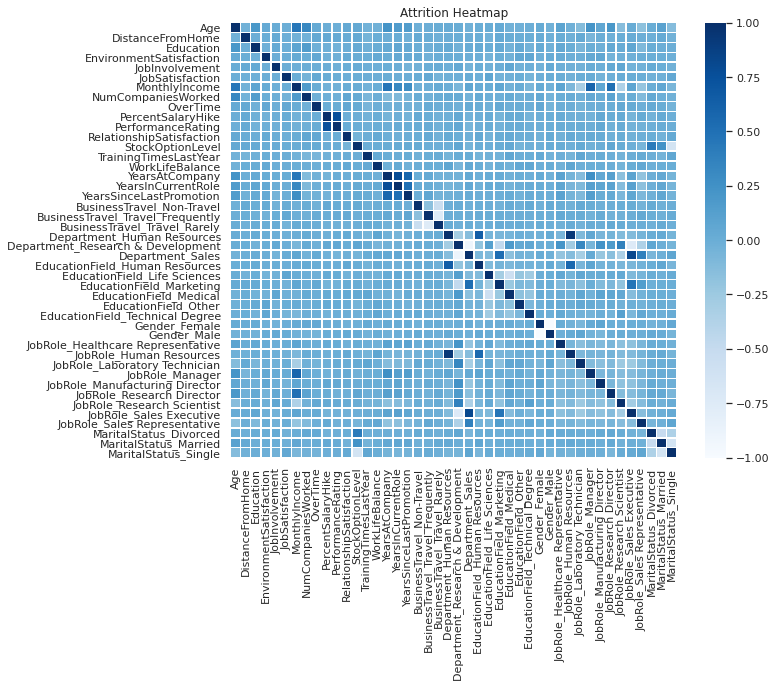

In [88]:
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Attrition Heatmap")
corr = datascaled.corr()
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values, cmap="Blues",linewidths=.5)

In [89]:
data4.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,EmployeeNumber
count,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.0,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000
mean,36.507102,8.676136,2.884233,2.745739,2.754261,2.011364,2.737926,6244.639205,2.669744,0.281250,15.118608,3.142045,2.718040,80.0,0.809659,10.708807,2.798295,2.760653,6.488636,4.002841,1.924716,3.962358,0.257812,1714.489347
std,8.879431,7.610653,1.020100,1.082580,0.701797,1.064988,1.092813,4491.290477,2.512998,0.449769,3.564732,0.349221,1.081295,0.0,0.852684,7.238088,1.300242,0.698430,5.195661,3.405751,2.795572,3.410445,0.437586,1905.762716
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2874.000000,1.000000,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,578.750000
50%,35.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4809.000000,2.000000,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,1174.000000
75%,42.000000,13.000000,4.000000,4.000000,3.000000,2.000000,4.000000,7672.500000,4.000000,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,1.000000,1771.250000
max,59.000000,28.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19926.000000,9.000000,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,36.000000,6.000000,4.000000,26.000000,15.000000,14.000000,16.000000,1.000000,7957.000000


In [90]:
x = datascaled.drop(['Department_Human Resources', 'Department_Sales'], axis=1)
xtest=datascaledtest.drop(['Department_Human Resources', 'Department_Sales'], axis=1)

In [91]:
visualcomparison = pd.concat([x.reset_index(drop=True), y.reset_index(drop=True)], axis=1)

In [92]:
xtest

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1323,35.0,27.0,1.0,3.0,2.0,1.0,2559.0,1.0,0,11.0,3.0,4.0,0.0,3.0,2.0,6.0,5.0,1.0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1324,27.0,5.0,3.0,3.0,3.0,2.0,2478.0,1.0,1,12.0,3.0,2.0,0.0,2.0,2.0,4.0,3.0,1.0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1325,24.0,4.0,1.0,4.0,3.0,3.0,4162.0,1.0,1,12.0,3.0,3.0,2.0,3.0,3.0,5.0,4.0,0.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1326,37.0,9.0,4.0,1.0,3.0,2.0,8834.0,1.0,0,13.0,3.0,4.0,1.0,6.0,3.0,9.0,5.0,7.0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1327,33.0,1.0,4.0,4.0,3.0,4.0,2686.0,1.0,1,13.0,3.0,3.0,0.0,2.0,2.0,10.0,9.0,7.0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,35.0,8.0,4.0,3.0,3.0,3.0,4148.0,1.0,0,12.0,3.0,4.0,1.0,5.0,3.0,14.0,11.0,2.0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
1466,41.0,28.0,4.0,1.0,2.0,2.0,13570.0,0.0,0,23.0,4.0,3.0,1.0,3.0,3.0,20.0,7.0,0.0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1467,42.0,6.0,3.0,3.0,3.0,1.0,13348.0,9.0,0,13.0,3.0,2.0,1.0,3.0,4.0,13.0,7.0,5.0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1468,44.0,15.0,3.0,1.0,3.0,4.0,7978.0,1.0,0,11.0,3.0,4.0,1.0,2.0,3.0,10.0,7.0,0.0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



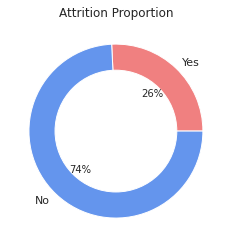

In [93]:
Y_count = len(data4[data4['Attrition'] == 1])
N_count = len(data4[data4['Attrition'] == 0])
# create data
names='Yes', 'No',
size=[Y_count,N_count]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['lightcoral','cornflowerblue'],autopct='%1.0f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax = plt.axes()
ax.set_title("Attrition Proportion")
plt.show()

In [94]:
visualcomparison

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,30.0,1.0,1.0,4.0,2.0,4.0,5126.0,1.0,1,12.0,3.0,3.0,2.0,1.0,2.0,10.0,8.0,3.0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1,38.0,2.0,2.0,4.0,2.0,3.0,7756.0,3.0,1,19.0,3.0,4.0,1.0,6.0,4.0,5.0,4.0,0.0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,26.0,6.0,3.0,3.0,2.0,2.0,2368.0,1.0,0,19.0,3.0,3.0,0.0,3.0,2.0,5.0,4.0,4.0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,28.0,8.0,2.0,4.0,3.0,4.0,3310.0,1.0,0,21.0,4.0,4.0,0.0,3.0,3.0,5.0,3.0,0.0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35.0,4.0,2.0,3.0,3.0,4.0,1951.0,1.0,0,12.0,3.0,3.0,1.0,3.0,3.0,1.0,0.0,0.0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,42.0,23.0,2.0,4.0,2.0,3.0,4332.0,1.0,0,12.0,3.0,4.0,0.0,2.0,3.0,20.0,9.0,3.0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1404,27.0,7.0,3.0,4.0,2.0,1.0,6811.0,8.0,0,19.0,3.0,1.0,0.0,2.0,1.0,7.0,6.0,0.0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1
1405,39.0,12.0,3.0,4.0,3.0,2.0,5295.0,4.0,0,21.0,4.0,3.0,0.0,3.0,3.0,5.0,4.0,1.0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1406,35.0,25.0,2.0,1.0,2.0,4.0,3681.0,4.0,0,14.0,3.0,4.0,0.0,3.0,3.0,3.0,2.0,0.0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1


In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=42)

Resampling

In [96]:
# check version number
import imblearn
print(imblearn.__version__)

# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from collections import Counter
from numpy.random import RandomState
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTENC

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



0.4.3


In [97]:
#produkcja świętego i nienaruszalnego zbioru do sprawdzania
y_valid = y_test
x_valid = X_test
x2 = X_train
y2 = y_train

In [98]:
#resampling
shuffled_df = X_train.merge(y_train, how = 'right', left_index=True, right_index=True)

In [99]:
normalized_df=shuffled_df 

In [100]:
sm = SMOTENC(random_state=42, categorical_features=[2, 3,4,5,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41])
X_res, y_res = sm.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [101]:
res_train = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
res_train.columns = normalized_df.columns

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



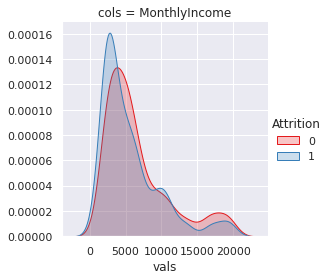

In [102]:
Age_YAC_NCW = res_train[[ 'MonthlyIncome','Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Focus on the red area--distribution of Attrition
#Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture.. 
#Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

In [103]:
y_train_res = res_train.iloc[:,-1]
x_train_res = res_train.iloc[:,:-1]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



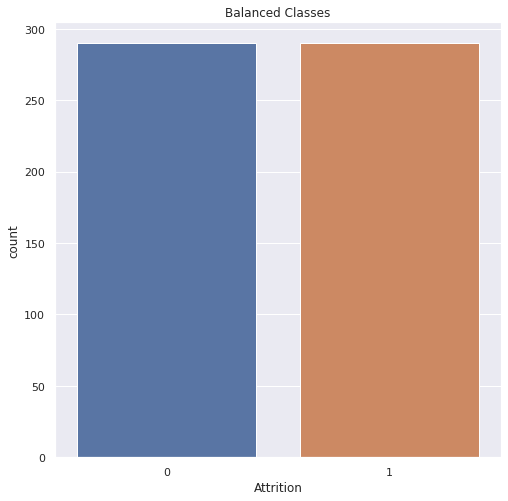

In [104]:
shuffled_df = shuffled_df.sample(frac=1,random_state=4)
# Put all the fraud class in a separate dataset.
att_df = shuffled_df.loc[shuffled_df['Attrition'] == 1]
#Randomly select 492 observations from the non-fraud (majority class)
non_att_df = shuffled_df.loc[shuffled_df['Attrition'] == 0].sample(n=290,random_state=42)

normalized_df = pd.concat([non_att_df, att_df], axis=0)
normalized_df = normalized_df.sample(frac=1,random_state=4)
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('Attrition', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

In [105]:
y_train_under = normalized_df.iloc[:,-1]
x_train_under = normalized_df.iloc[:,:-1]


dla niezbalansowanego zbioru - BalancedBaggingClassifier - nie pomogło

In [106]:
from imblearn.ensemble import BalancedBaggingClassifier
# from sklearn.tree import DecisionTreeClassifier

# #Create an object of the classifier.
# bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
#                                 sampling_strategy='auto',
#                                 replacement=False,
#                                 random_state=0)


# #Train the classifier.
# bbc.fit(X_train, y_train)
# preds = bbc.predict(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from skl

In [107]:
# print_results(calculate_metrics(y_train, preds), 'balanced')


In [108]:
# cm = confusion_matrix(y_train, preds)
# sns.heatmap(cm, annot=True, fmt='d')
# print(classification_report(y_train, preds))

In [109]:
# preds = bbc.predict(X_test)

In [110]:
# print_results(calculate_metrics(y_test, preds), 'balanced')

In [111]:
# cm = confusion_matrix(y_test, preds)
# sns.heatmap(cm, annot=True, fmt='d')
# print(classification_report(y_test, preds))

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=42)

In [113]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train, test in cv.split(x_train_res, y_train_res):
  X_train_kfold, y_train_kfold = x_train_res.iloc[train], y_train_res.iloc[train]
  X_test_kfold, y_test_kfold = x_train_res.iloc[test], y_train_res.iloc[test]

SVC
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       209
           1       0.26      0.38      0.31        73

    accuracy                           0.56       282
   macro avg       0.50      0.51      0.50       282
weighted avg       0.62      0.56      0.59       282



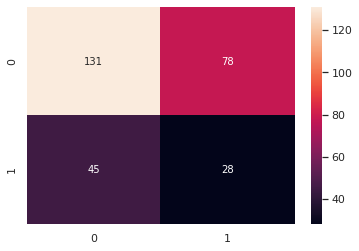

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.70      0.54      0.61       209
           1       0.20      0.34      0.26        73

    accuracy                           0.49       282
   macro avg       0.45      0.44      0.43       282
weighted avg       0.57      0.49      0.52       282



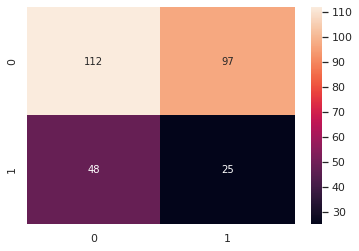

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       209
           1       0.19      0.22      0.20        73

    accuracy                           0.55       282
   macro avg       0.45      0.44      0.45       282
weighted avg       0.58      0.55      0.56       282



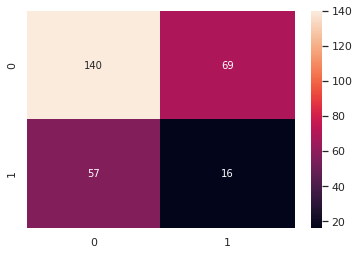

In [114]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
classifiers = [SVC, KNeighborsClassifier, DecisionTreeClassifier]
for classifier_class in classifiers:
    model = classifier_class()
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_valid)
    print(model.__class__.__name__)
    print(classification_report(y_valid, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

SVC
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       209
           1       0.26      0.38      0.31        73

    accuracy                           0.56       282
   macro avg       0.50      0.50      0.49       282
weighted avg       0.62      0.56      0.58       282



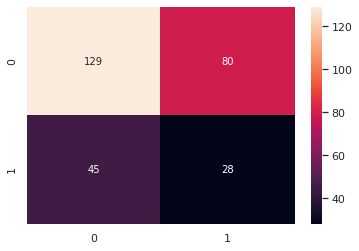

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.73      0.54      0.62       209
           1       0.25      0.44      0.32        73

    accuracy                           0.51       282
   macro avg       0.49      0.49      0.47       282
weighted avg       0.61      0.51      0.54       282



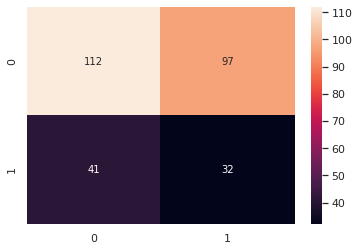

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       209
           1       0.17      0.21      0.19        73

    accuracy                           0.53       282
   macro avg       0.43      0.43      0.43       282
weighted avg       0.56      0.53      0.55       282



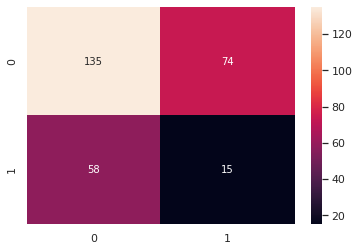

In [115]:

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
classifiers = [SVC, KNeighborsClassifier, DecisionTreeClassifier]
for classifier_class in classifiers:
    model = classifier_class()
    model.fit(X_train_kfold, y_train_kfold)
    y_pred_kfold = model.predict(x_valid)
    print(model.__class__.__name__)
    print(classification_report(y_valid, y_pred_kfold))
    cm = confusion_matrix(y_valid, y_pred_kfold)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

KNN


In [116]:
from sklearn.neighbors import KNeighborsClassifier
# Create and fit the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_res, y_train_res)
# Predict on the test features, print the results
pred = knn.predict(x_valid)

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy
def calculate_metrics(target, prediction, average='micro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total
def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [118]:
print_results(calculate_metrics(y_valid, pred), 'kNN')

Results for kNN
----
  Accuracy:  0.4858156028368794
  Precision: 0.4858156028368794
  Recall:    0.4858156028368794
  F1 score:  0.4858156028368794
  Mislabeled 145 out of 282




In [119]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

              precision    recall  f1-score   support

           0       0.70      0.54      0.61       209
           1       0.20      0.34      0.26        73

    accuracy                           0.49       282
   macro avg       0.45      0.44      0.43       282
weighted avg       0.57      0.49      0.52       282



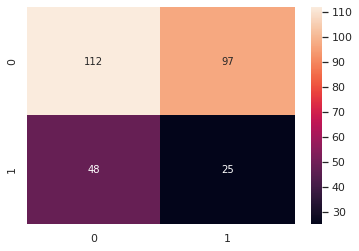

In [120]:
cm = confusion_matrix(y_valid, pred)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_valid, pred))

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
# params_knn = {
#     'n_neighbors': [2, 3, 5, 7, 10, 15],
#     'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree']
# }
# clf  = GridSearchCV(KNeighborsClassifier(), params_knn, scoring = 'recall')
# clf.fit(x_train_res, y_train_res)
# clf.best_params_

In [123]:
knn = KNeighborsClassifier(algorithm= 'ball_tree', metric= 'manhattan', n_neighbors= 3)

In [124]:
knn.fit(x_train_res, y_train_res)
y_pred_kfold = knn.predict(x_valid)

In [125]:
print_results(calculate_metrics(y_valid, y_pred_kfold), 'kNN for KFold')

Results for kNN for KFold
----
  Accuracy:  0.4787234042553192
  Precision: 0.4787234042553192
  Recall:    0.4787234042553192
  F1 score:  0.47872340425531923
  Mislabeled 147 out of 282




              precision    recall  f1-score   support

           0       0.72      0.49      0.58       209
           1       0.23      0.44      0.30        73

    accuracy                           0.48       282
   macro avg       0.47      0.47      0.44       282
weighted avg       0.59      0.48      0.51       282



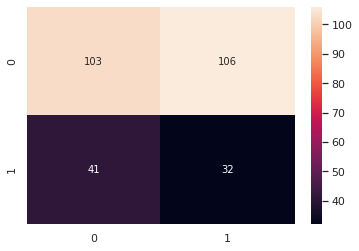

In [126]:
cm = confusion_matrix(y_valid, y_pred_kfold)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_valid, y_pred_kfold))

In [127]:
# y_pred = knn.predict()
# y_pred.to_csv(index=False)

In [128]:
# y_pred_kfold_csv = pd.DataFrame(data=y_pred_kfold)
# y_pred_kfold_csv('y_pred.csv', index = False)
# from google.colab import files
# files.download('y_pred.csv')

SVC

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

params_grid = {
    'C': [0.01, 0.1, 1, 10, 100,],
    'class_weight': [None, "balanced"],
'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]
}

clf = GridSearchCV(SVC(), params_grid, scoring="recall")
clf.fit(x_train_res, y_train_res)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [130]:
y_pred = clf.predict(x_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68       209
           1       0.23      0.32      0.27        73

    accuracy                           0.56       282
   macro avg       0.48      0.48      0.48       282
weighted avg       0.60      0.56      0.58       282



GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [131]:
model = SVC(C=1, class_weight=None, kernel="rbf")
model.fit(x_train_res, y_train_res)
y_pred = model.predict(x_valid)

In [132]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       209
           1       0.26      0.38      0.31        73

    accuracy                           0.56       282
   macro avg       0.50      0.51      0.50       282
weighted avg       0.62      0.56      0.59       282



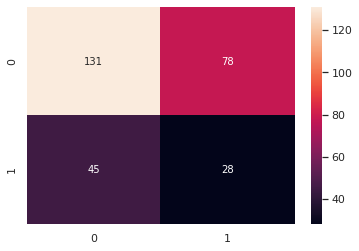

In [133]:
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [134]:
model.fit(X_train_kfold, y_train_kfold)
y_pred = model.predict(x_valid)

In [135]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.62      0.67       209
           1       0.26      0.38      0.31        73

    accuracy                           0.56       282
   macro avg       0.50      0.50      0.49       282
weighted avg       0.62      0.56      0.58       282



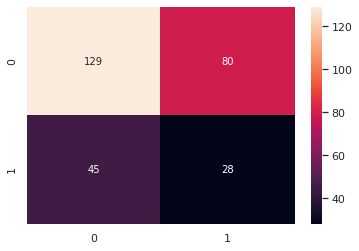

In [136]:
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

MaritalStatus_Married-0.00%
Representative-0.00%
JobRole_Research Scientist-0.00%
JobRole_Manager-0.00%
EducationField_Human Resources-0.00%
EducationField_Life Sciences-0.00%
JobRole_Healthcare Representative-0.20%
JobRole_Research Director-0.27%
EducationField_Marketing-0.44%
MaritalStatus_Divorced-0.64%
EducationField_Technical Degree-0.67%
JobRole_Sales-0.94%
JobRole_Human Resources-0.95%
EducationField_Other-1.46%
Education-1.61%
JobRole_Sales Executive-1.79%
JobRole_Laboratory Technician-2.18%
EducationField_Medical-2.39%
JobRole_Manufacturing Director-5.32%
NumCompaniesWorked-7.64%
DistanceFromHome-8.13%
HourlyRate-10.30%
JobInvolvement-10.65%
JobSatisfaction-11.68%
MonthlyIncome-14.35%
Age-18.38%

In [137]:
xdr = x_train_res.drop(['JobRole_Research Director','JobRole_Manager','EducationField_Life Sciences',  'EducationField_Marketing','JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Sales Representative', 'JobRole_Laboratory Technician', 'EducationField_Technical Degree', 'JobRole_Research Scientist', 'MaritalStatus_Married','EducationField_Marketing','MaritalStatus_Divorced','JobRole_Human Resources','EducationField_Other', 'Education' ,'JobRole_Sales Executive','JobRole_Laboratory Technician', 'EducationField_Medical'], axis=1)
xvalid = x_valid.drop(['JobRole_Research Director','JobRole_Manager','EducationField_Life Sciences',  'EducationField_Marketing','JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Sales Representative', 'JobRole_Laboratory Technician', 'EducationField_Technical Degree', 'JobRole_Research Scientist', 'MaritalStatus_Married','EducationField_Marketing','MaritalStatus_Divorced','JobRole_Human Resources','EducationField_Other', 'Education' ,'JobRole_Sales Executive','JobRole_Laboratory Technician', 'EducationField_Medical'], axis=1)
xdrtest = xtest.drop(['JobRole_Research Director','JobRole_Manager','EducationField_Life Sciences',  'EducationField_Marketing','JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Sales Representative', 'JobRole_Laboratory Technician', 'EducationField_Technical Degree', 'JobRole_Research Scientist', 'MaritalStatus_Married','EducationField_Marketing','MaritalStatus_Divorced','JobRole_Human Resources','EducationField_Other', 'Education' ,'JobRole_Sales Executive','JobRole_Laboratory Technician', 'EducationField_Medical'], axis=1)


In [138]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train, test in cv.split(xdr, y_train_res):
  X_train_kfolddr, y_train_kfolddr = xdr.iloc[train], y_train_res.iloc[train]
  X_test_kfolddr, y_test_kfolddr = xdr.iloc[test], y_train_res.iloc[test]

In [139]:
# vm = SVC()

# # Instantiate the GridSearchCV object and run the search
# parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
# searcher = GridSearchCV(vm, parameters, scoring = 'recall')
# searcher.fit(X_train_kfolddr, y_train_kfolddr)

# # Report the best parameters and the corresponding score
# print("Best CV params", searcher.best_params_)
# print("Best CV accuracy", searcher.best_score_)

# # Report the test accuracy using these best parameters
# print("Test accuracy of best grid search hypers:", searcher.score(X_test_kfolddr, y_test_kfolddr))

In [140]:
model = SVC(C=10, gamma =0.0001, class_weight=None, kernel="linear")

In [141]:
model.fit(X_train_kfolddr, y_train_kfolddr)
y_pred = model.predict(xvalid)

In [142]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72       209
           1       0.32      0.45      0.38        73

    accuracy                           0.61       282
   macro avg       0.55      0.56      0.55       282
weighted avg       0.66      0.61      0.63       282



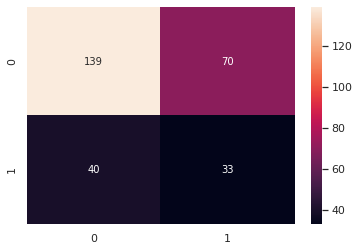

In [143]:
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

piklujemy najlepszy plik

In [144]:
# #picklujemy ;pp

y_final = model.predict(xdrtest)



In [145]:
# testy

In [146]:
y_final = pd.DataFrame(y_final)
y_final

,0
0,0
1,1
2,0
3,0
4,1
...,...
142,0
143,0
144,0
145,0


In [147]:
sampleoutput = pd.concat([testy.reset_index(drop=True), y_final.reset_index(drop=True)], axis=1)

In [148]:
sample_output = sampleoutput.drop(['Attrition'], axis=1)


In [149]:
sample_output2 = sample_output.rename(columns={0:'Attrition'})
sample_output2

,EmployeeNumber,Attrition
0,100000,0
1,100001,1
2,100002,0
3,100003,0
4,100004,1
...,...,...
142,100142,0
143,100143,0
144,100144,0
145,100145,0


In [150]:
sample_output2.to_csv("y_pred.csv", index=False)

In [151]:
########################################0.49

In [152]:
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(4,200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199)
}

In [153]:
# # create random forest classifier model
# rf_model = RandomForestClassifier()

# # set up random search meta-estimator
# # this will train 100 models over 5 folds of cross validation (500 models total)
# clf = RandomizedSearchCV(rf_model, model_params, n_iter=100, cv=5, random_state=1, scoring='recall')

# # train the random search meta-estimator to find the best model out of 100 candidates
# model = clf.fit(X_train_kfolddr, y_train_kfolddr)

# # print winning set of hyperparameters
# from pprint import pprint
# pprint(model.best_estimator_.get_params())

In [154]:
rf_model = RandomForestClassifier(bootstrap= True,
 ccp_alpha= 0.0,
 class_weight= None,
 criterion= 'gini',
 max_depth= None,
 max_features= 0.25128509599721727,
 max_leaf_nodes= None,
 max_samples= None,
 min_impurity_decrease= 0.0,
 min_impurity_split= None,
 min_samples_leaf= 1,
 min_samples_split= 0.04510449328790615,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 77,
 n_jobs= None,
 oob_score= False,
 random_state= None,
 verbose= 0,
 warm_start= False)

In [155]:
model = rf_model.fit(X_train_kfolddr, y_train_kfolddr)

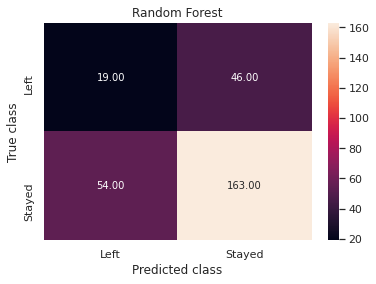

In [156]:
y_preddr = rf_model.predict(xvalid)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_preddr, y_valid, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [157]:
print(classification_report(y_preddr, y_valid))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       217
           1       0.26      0.29      0.28        65

    accuracy                           0.65       282
   macro avg       0.52      0.52      0.52       282
weighted avg       0.66      0.65      0.65       282



In [158]:
y_final = rf_model.predict(xdrtest)

In [159]:
y_final = pd.DataFrame(y_final)
sampleoutput = pd.concat([testy.reset_index(drop=True), y_final.reset_index(drop=True)], axis=1)
sample_output = sampleoutput.drop(['Attrition'], axis=1)
sample_output2 = sample_output.rename(columns={0:'Attrition'})
sample_output2
sample_output2.to_csv("y_pred.csv", index=False)

drzewo

In [160]:
from sklearn.tree import plot_tree

In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [162]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [163]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [164]:
# plt.figure(dpi=300)
# plot_tree(clf)
# plt.show()

Results for Decision Tree train
----
  Accuracy:  0.9551569506726457
  Precision: 0.9551569506726457
  Recall:    0.9551569506726457
  F1 score:  0.9551569506726457
  Mislabeled 60 out of 1338




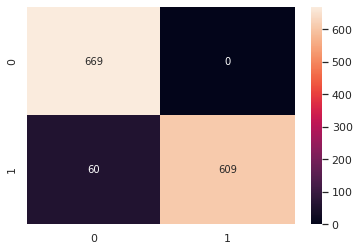

In [165]:
clf = DecisionTreeClassifier()
clf.fit(X_train_kfold, y_train_kfold)
y_dt_train =  clf.predict(X_train_kfold)
print_results(calculate_metrics(y_train_kfold.values, y_dt_train), 'Decision Tree train')
cm = confusion_matrix(y_train_kfold, y_dt_train)
sns.heatmap(cm, annot=True, fmt='d')


Results for Decision Tree train
----
  Accuracy:  0.5283687943262412
  Precision: 0.5283687943262412
  Recall:    0.5283687943262412
  F1 score:  0.5283687943262412
  Mislabeled 133 out of 282




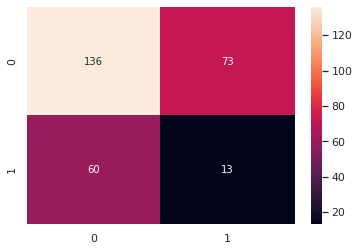

In [166]:
y_dt = clf.predict(x_valid)
print_results(calculate_metrics(y_valid, y_dt), 'Decision Tree train')
cm = confusion_matrix(y_valid, y_dt)
sns.heatmap(cm, annot=True, fmt='d')

In [167]:
clf = DecisionTreeClassifier()
clf.fit(x_train_res, y_train_res)
y_dt = clf.predict(x_valid)

Results for Decision Tree train
----
  Accuracy:  0.5673758865248227
  Precision: 0.5673758865248227
  Recall:    0.5673758865248227
  F1 score:  0.5673758865248227
  Mislabeled 122 out of 282




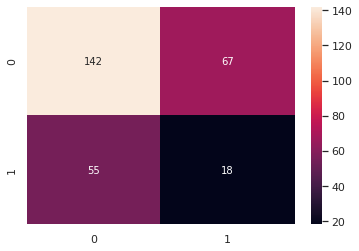

In [168]:
y_dt_train =  clf.predict(x_valid)
print_results(calculate_metrics(y_valid, y_dt_train), 'Decision Tree train')
cm = confusion_matrix(y_valid, y_dt_train)
sns.heatmap(cm, annot=True, fmt='d')


Results for Decision Tree train
----
  Accuracy:  0.5673758865248227
  Precision: 0.5673758865248227
  Recall:    0.5673758865248227
  F1 score:  0.5673758865248227
  Mislabeled 122 out of 282




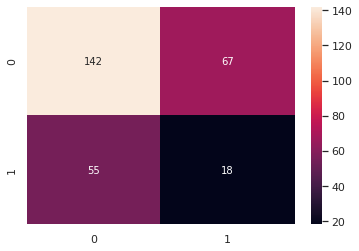

In [169]:
y_dt = clf.predict(X_test)
print_results(calculate_metrics(y_test.values, y_dt), 'Decision Tree train')
cm = confusion_matrix(y_test, y_dt)
sns.heatmap(cm, annot=True, fmt='d')

In [170]:
def plot_confusion_matrix(confusion_matrix, classes, title=None,
                          title_appendix='',
                          cmap=plt.cm.Blues):
    # tytuł wykresu
    if title_appendix:
        title_appendix = f'({title_appendix})'
    if title is None:
        title = f'Confusion matrix {title_appendix}'
    fig, ax = plt.subplots()
    # rysuje CM
    img = ax.imshow(confusion_matrix, cmap=cmap)
    # dodaje pasek z boku
    ax.figure.colorbar(img, ax=ax)
    # dodatki do wykresu
    ax.set_xticks(np.arange(confusion_matrix.shape[1]))
    ax.set_xticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_yticks(np.arange(confusion_matrix.shape[0]))
    ax.set_yticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    # etykiety
    fmt = '.2f' if confusion_matrix.dtype == 'float' else 'd'
    thresh = confusion_matrix.max() / 2
    for y, row in enumerate(confusion_matrix):
        for x, cell in enumerate(row):
            ax.text(x, y, format(cell, fmt),
                    ha='center', va='center',
                    color='white' if cell > thresh else 'black')
    fig.tight_layout()
    return ax

In [171]:
#print_results(calculate_metrics(y_test.values, y_dt), 'Decision Tree test')
#cm = confusion_matrix(y_test, y_dt)
#plot_confusion_matrix(cm, y)

In [172]:
#classes = cleaneddata.pop(y).unique()

Results for Decision Tree test
----
  Accuracy:  0.5673758865248227
  Precision: 0.5673758865248227
  Recall:    0.5673758865248227
  F1 score:  0.5673758865248227
  Mislabeled 122 out of 282




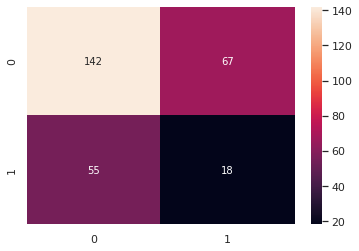

In [173]:
print_results(calculate_metrics(y_test.values, y_dt), 'Decision Tree test')
cm = confusion_matrix(y_test, y_dt)
sns.heatmap(cm, annot=True, fmt='d')

In [174]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

66.67


In [175]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       209
           1       0.20      0.10      0.13        73

    accuracy                           0.67       282
   macro avg       0.47      0.48      0.46       282
weighted avg       0.59      0.67      0.62       282



In [176]:
print(X_train)

       Age  DistanceFromHome  ...  MaritalStatus_Married  MaritalStatus_Single
2775  23.0               1.0  ...                      1                     0
2048  40.0               8.0  ...                      1                     0
4374  37.0               3.0  ...                      0                     1
991   20.0               9.0  ...                      0                     1
823   31.0              20.0  ...                      1                     0
...    ...               ...  ...                    ...                   ...
815   29.0               7.0  ...                      0                     0
975   29.0               3.0  ...                      1                     0
3132  34.0               6.0  ...                      0                     1
1015  35.0               1.0  ...                      1                     0
875   33.0              25.0  ...                      0                     1

[1126 rows x 42 columns]


random forest

In [177]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       209
           1       0.15      0.07      0.09        73

    accuracy                           0.66       282
   macro avg       0.44      0.46      0.44       282
weighted avg       0.58      0.66      0.61       282



In [178]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [179]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [180]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       209
           1       0.37      0.41      0.39        73

    accuracy                           0.66       282
   macro avg       0.58      0.58      0.58       282
weighted avg       0.68      0.66      0.67       282



In [181]:
gnb = GaussianNB()  # inny klasyfikator
gnb.fit(X_train, y_train)
y_gnb = gnb.predict(X_test)
print(y_test.values)
print(y_gnb)
print(confusion_matrix(y_test,y_gnb))

[1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1]
[1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0
 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1
 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1
 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0

f1 = 0.48

In [182]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [183]:
print_results(calculate_metrics(y_test.values, y_gnb), 'GNB')

Results for GNB
----
  Accuracy:  0.6631205673758865
  Precision: 0.5754268292682927
  Recall:    0.5810775381791964
  F1 score:  0.5774114677813708
  Mislabeled 95 out of 282




In [184]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [185]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.652


In [186]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, shuffle=True,random_state=7)
modelCV = RandomForestClassifier()
scoring = 'recall'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.107


In [187]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.86      0.79       209
           1       0.14      0.07      0.09        73

    accuracy                           0.65       282
   macro avg       0.43      0.46      0.44       282
weighted avg       0.57      0.65      0.61       282



In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

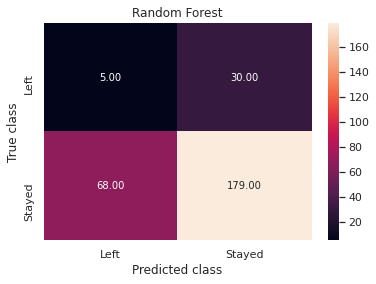

In [189]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [190]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [191]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.741


In [192]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'f1'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



10-fold cross validation average accuracy: 0.152


In [193]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       209
           1       0.00      0.00      0.00        73

    accuracy                           0.74       282
   macro avg       0.37      0.50      0.43       282
weighted avg       0.55      0.74      0.63       282



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



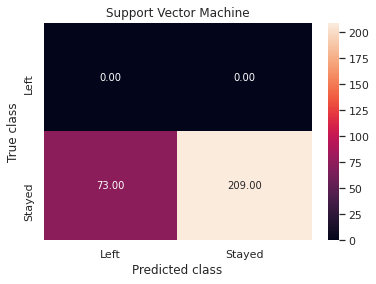

In [194]:
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

In [195]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000000000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000000000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [196]:
y_predlog = logreg.predict(X_test)
print(classification_report(y_test, y_predlog))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       209
           1       0.57      0.18      0.27        73

    accuracy                           0.75       282
   macro avg       0.67      0.57      0.56       282
weighted avg       0.72      0.75      0.70       282



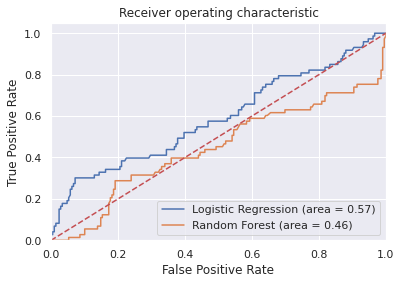

In [197]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [198]:
X_train

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
2775,23.0,1.0,2.0,4.0,3.0,3.0,1223.0,1.0,0,22.0,4.0,4.0,1.0,2.0,3.0,1.0,0.0,0.0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2048,40.0,8.0,2.0,2.0,3.0,1.0,6516.0,2.0,1,16.0,3.0,2.0,1.0,3.0,3.0,1.0,0.0,0.0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4374,37.0,3.0,3.0,4.0,3.0,2.0,4107.0,3.0,0,15.0,3.0,1.0,0.0,3.0,2.0,4.0,3.0,0.0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
991,20.0,9.0,1.0,4.0,3.0,1.0,2728.0,1.0,0,11.0,3.0,1.0,0.0,3.0,3.0,2.0,2.0,0.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
823,31.0,20.0,3.0,3.0,4.0,4.0,2791.0,0.0,0,12.0,3.0,1.0,1.0,4.0,3.0,2.0,2.0,2.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,29.0,7.0,3.0,3.0,3.0,4.0,6623.0,1.0,1,11.0,3.0,2.0,2.0,2.0,3.0,6.0,0.0,1.0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
975,29.0,3.0,2.0,2.0,3.0,3.0,5561.0,1.0,0,14.0,3.0,1.0,1.0,5.0,2.0,6.0,0.0,1.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3132,34.0,6.0,4.0,1.0,3.0,3.0,4809.0,1.0,0,14.0,3.0,3.0,0.0,3.0,3.0,16.0,13.0,2.0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1015,35.0,1.0,4.0,3.0,1.0,4.0,2977.0,1.0,0,12.0,3.0,4.0,1.0,5.0,3.0,4.0,3.0,1.0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [199]:
feature_labels = np.array(['Age','DistanceFromHome', 'HourlyRate', 'MonthlyIncome','Education',  'JobInvolvement',  'JobSatisfaction',  'NumCompaniesWorked','EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing','EducationField_Medical'	,'EducationField_Other'	,'EducationField_Technical Degree'	,'JobRole_Healthcare Representative'	,'JobRole_Human Resources'	,'JobRole_Laboratory Technician'	,'JobRole_Manager'	,'JobRole_Manufacturing Director'	,'JobRole_Research Director'	,'JobRole_Research Scientist'	,'JobRole_Sales Executive'	,'JobRole_Sales'	,'Representative'	,'MaritalStatus_Divorced'	,'MaritalStatus_Married'	,'MaritalStatus_Single'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

JobRole_Sales-0.31%


IndexError: ignored

In [ ]:
# Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# If you're working in Jupyter Notebook, include the following so that plots will display:
%matplotlib inline

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = BaggingClassifier(base_estimator=GaussianNB())

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier())

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

# param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}

# gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

# gs = gs.fit(X_train, y_train)



In [ ]:
# gspred = gs.predict(X_test)
# print(mean_absolute_error(y_test, gspred))
# print_results(calculate_metrics(y_test, gspred), 'rf')

In [ ]:
# import random search, random forest, iris data, and distributions
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, truncnorm, randint
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# # create random forest classifier model
# rf_model = RandomForestClassifier()

# # set up random search meta-estimator
# # this will train 100 models over 5 folds of cross validation (500 models total)
# clf = RandomizedSearchCV(rf_model, model_params, n_iter=1000, cv=5, random_state=1)

# # train the random search meta-estimator to find the best model out of 100 candidates
# model = clf.fit(X_train_kfold, y_train_kfold)

# # print winning set of hyperparameters
# from pprint import pprint
# pprint(model.best_estimator_.get_params())

In [ ]:
rf_model = RandomForestClassifier(bootstrap= True,
 ccp_alpha= 0.0,
 class_weight= None,
 criterion= 'gini',
 max_depth= None,
 max_features= 0.3273997841467096,
 max_leaf_nodes= None,
 max_samples= None,
 min_impurity_decrease= 0.0,
 min_impurity_split= None,
 min_samples_leaf= 1,
 min_samples_split= 0.13501967982900093,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 15,
 n_jobs= None,
 oob_score= False,
 random_state= None,
 verbose= 0,
 warm_start= False)

In [ ]:
model = rf_model.fit(X_train_kfold, y_train_kfold)

In [ ]:
X_test_kfold

f1 = 0.47

In [ ]:
y_pred = rf_model.predict(X_test_kfold)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test_kfold, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')
print(classification_report(y_test_kfold, rf_model.predict(X_test_kfold)))

In [ ]:
feature_labels = np.array(['Age','DistanceFromHome', 'HourlyRate', 'MonthlyIncome','Education',  'JobInvolvement',  'JobSatisfaction',  'NumCompaniesWorked','EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing','EducationField_Medical'	,'EducationField_Other'	,'EducationField_Technical Degree'	,'JobRole_Healthcare Representative'	,'JobRole_Human Resources'	,'JobRole_Laboratory Technician'	,'JobRole_Manager'	,'JobRole_Manufacturing Director'	,'JobRole_Research Director'	,'JobRole_Research Scientist'	,'JobRole_Sales Executive'	,'JobRole_Sales'	,'Representative'	,'MaritalStatus_Divorced'	,'MaritalStatus_Married'	,'MaritalStatus_Single'])
importance = rf_model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

In [ ]:

#%matplotlib nbagg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
#from bokeh.charts import Bar
from bokeh.io import output_notebook
from bokeh.models import Legend
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, learning_curve
from sklearn.metrics import f1_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [ ]:
clfs = [KNeighborsClassifier(n_neighbors = 1), 
      GaussianNB(),
      DecisionTreeClassifier(splitter = 'random'),
       RandomForestClassifier()]
clfName = {1:'KNN', 2:'Naive Bayes', 3:'Decision Trees', 4:'Random Forests'}

for i in range(len(clfs)):
    scores = cross_val_score(clfs[i], X_train_kfold, y_train_kfold.ravel(), cv=5, scoring = 'f1')
    print ("mean validation F1 for",clfName[i+1], ":", 
           "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    clf = clfs[i].fit(X_train_kfold, y_train_kfold.ravel())
    y_pred = clf.predict(X_test_kfold)
    f1 = f1_score(y_test_kfold, y_pred)
    print ('Test F1 for',clfName[i+1], ":", f1)

In [ ]:
clf = RandomForestClassifier()
plt.figure()
plt.ylim(0,1.2)
plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes, train_scores, test_scores = learning_curve(
    clf, x, y.ravel(), cv=5, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5),
    scoring = 'f1')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [ ]:
clf = RandomForestClassifier()

#X = preprocessing.scale(X)

clf = clf.fit(X_train_kfold, y_train_kfold.ravel())

cols = X_train_kfold.drop(['left'],1).columns
feature_importance_all = clf.feature_importances_
feature_importance = {}
for i in  range(len(cols)):
    feature_importance[cols[i]] = feature_importance_all[i]

feature_import =  pd.DataFrame.from_dict(feature_importance, 
                                         orient = 'index')
print (feature_import.sort(columns = 0, ascending = False))